<div style="text-align:center; font-weight:bold;">
    <h1>1. Naive Bayes Classifier</h1>
</div>

Accuracy: 0.9777777777777777
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

ROC AUC Score: 1.0


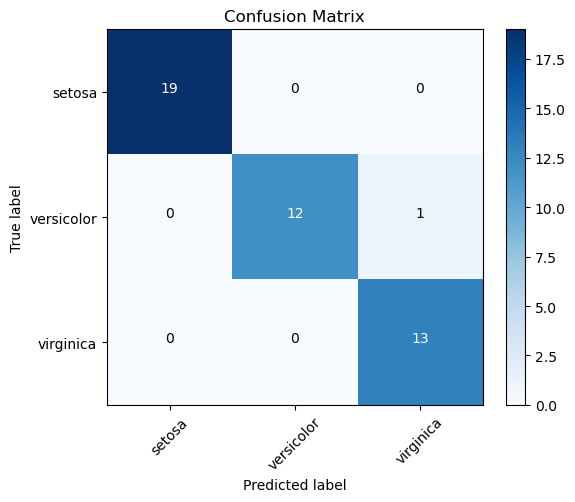

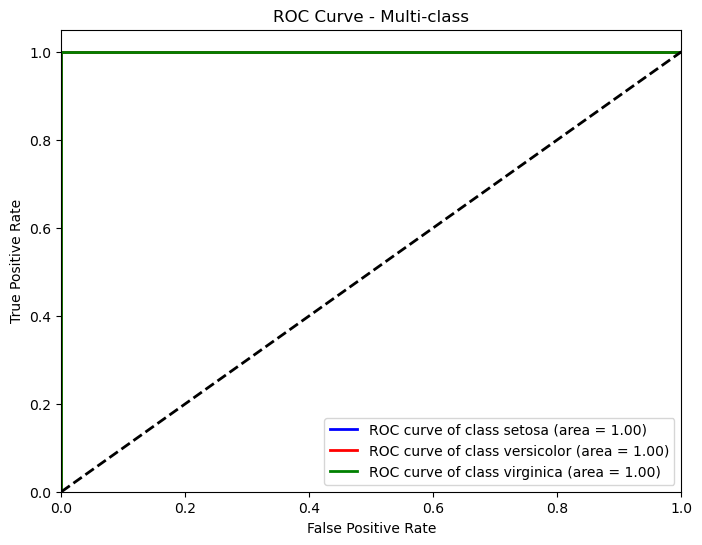

Cross-Validation Scores: [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Mean CV Score: 0.9533333333333334


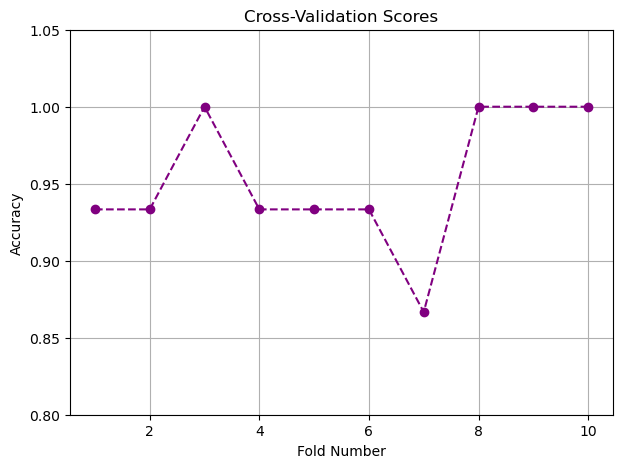

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

# Visualization - Confusion Matrix
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Visualization - ROC Curves for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {iris.target_names[i]} (area = {roc_auc_dict[i]:0.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class')
plt.legend(loc="lower right")
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Visualization - Cross-validation scores
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--', color='purple')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.05)
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>2. Simple Linear Regression</h1>
</div>

Mean Squared Error: 0.5305677824766761
R² Score: 0.5957702326061658


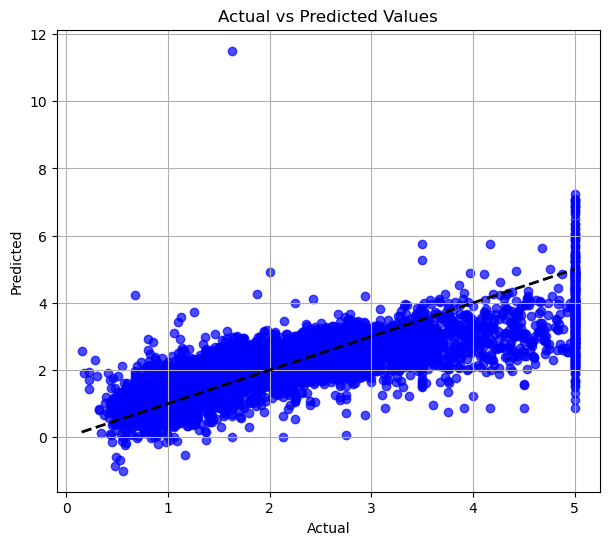

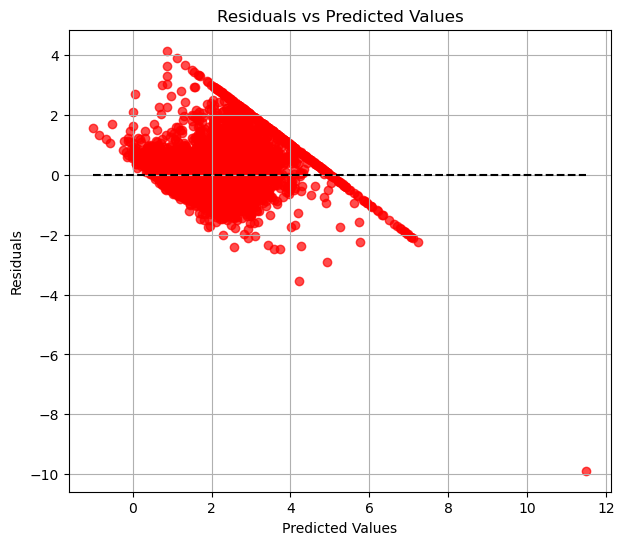

Cross-Validation MSE Scores: [0.48922052 0.43335865 0.8864377  0.39091641 0.7479731  0.52980278
 0.28798456 0.77326441 0.64305557 0.3275106 ]
Mean CV MSE Score: 0.5509524296956645


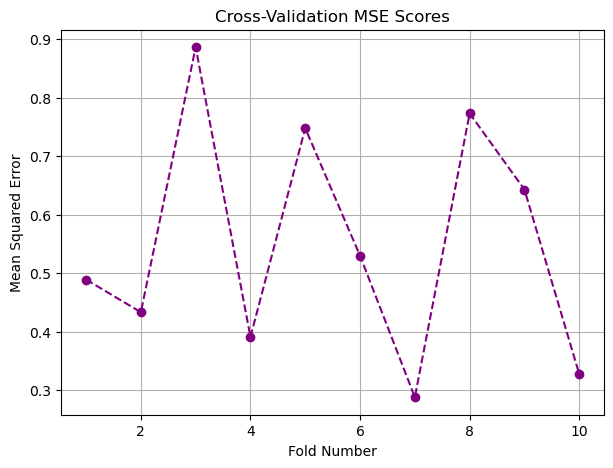

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualization - Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Visualization - Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(7, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='red')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='black', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean CV MSE Score: {-np.mean(cv_scores)}")

# Visualization - Cross-Validation MSE Scores
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), -cv_scores, marker='o', linestyle='--', color='purple')
plt.title('Cross-Validation MSE Scores')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>3. Multiple linear regression</h1>
</div>

Mean Squared Error: 0.5305677824766761
R² Score: 0.5957702326061658


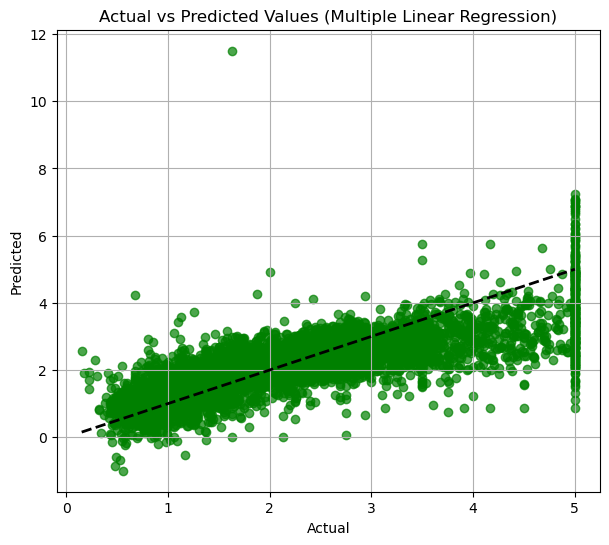

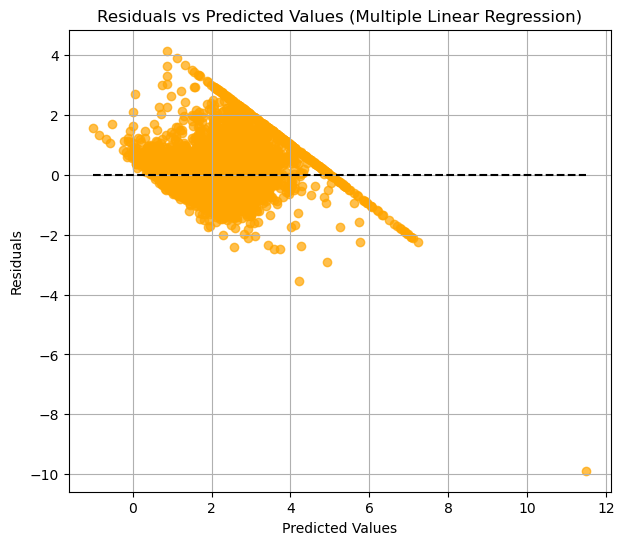

Cross-Validation MSE Scores: [0.48922052 0.43335865 0.8864377  0.39091641 0.7479731  0.52980278
 0.28798456 0.77326441 0.64305557 0.3275106 ]
Mean CV MSE Score: 0.5509524296956645


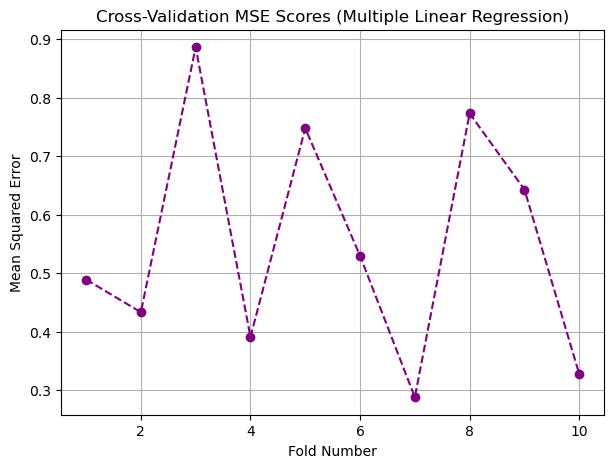

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualization - Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Multiple Linear Regression)')
plt.grid(True)
plt.show()

# Visualization - Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(7, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='orange')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='black', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Multiple Linear Regression)')
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean CV MSE Score: {-np.mean(cv_scores)}")

# Visualization - Cross-Validation MSE Scores
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), -cv_scores, marker='o', linestyle='--', color='purple')
plt.title('Cross-Validation MSE Scores (Multiple Linear Regression)')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>4. Polynomial Regression</h1>
</div>

Mean Squared Error: 0.4549723401416238
R² Score: 0.6533650000993758


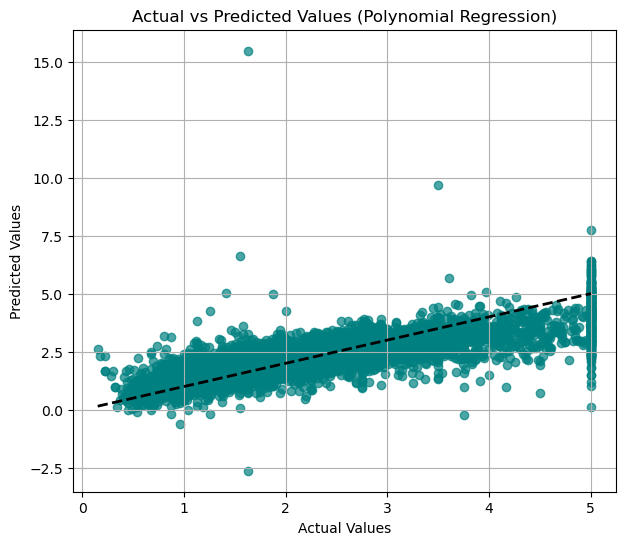

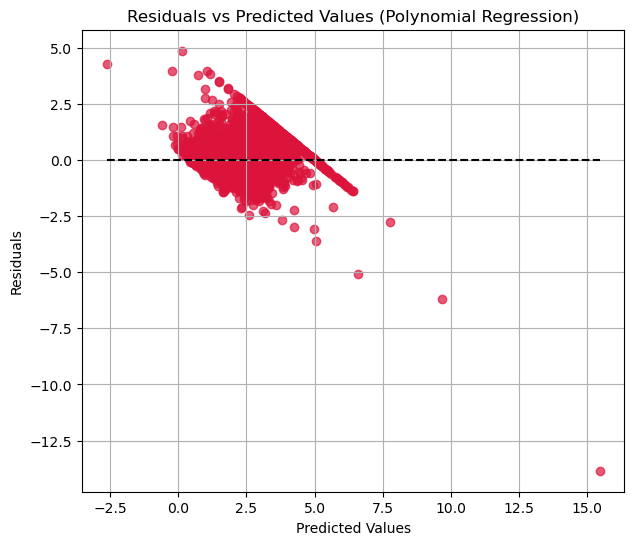

Cross-Validation MSE Scores: [0.46620397 1.57847367 0.67448261 0.36228006 0.83342127 0.46695189
 0.33853767 0.67037791 0.60800676 7.33621051]
Mean CV MSE Score: 1.3334946311876474


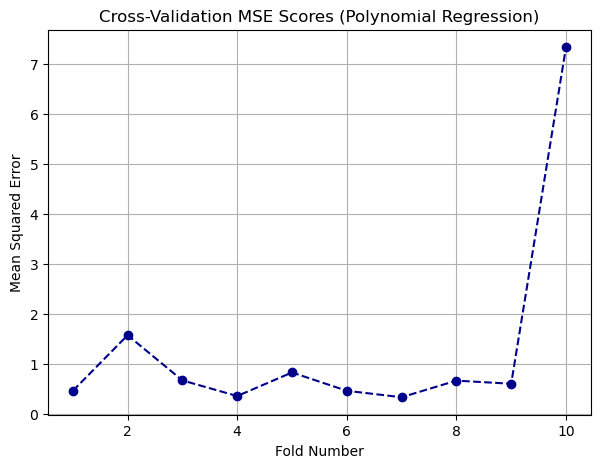

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Create a Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y_train)

# Predict the test set results
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualization - Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.grid(True)
plt.show()

# Visualization - Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(7, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='crimson')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='black', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Polynomial Regression)')
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, poly.fit_transform(X), y, cv=10, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE Scores: {-cv_scores}")
print(f"Mean CV MSE Score: {-np.mean(cv_scores)}")

# Visualization - Cross-Validation MSE Scores
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), -cv_scores, marker='o', linestyle='--', color='darkblue')
plt.title('Cross-Validation MSE Scores (Polynomial Regression)')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>5. Lasso and Ridge Regression</h1>
</div>

Lasso Regression - Mean Squared Error: 0.9345280531749286
Lasso Regression - R² Score: 0.28800038367478376
Lasso Regression - Cross-Validation MSE Scores: [0.64927802 1.13844549 1.24747033 0.48762689 1.42348212 0.82434853
 0.77866437 1.19487242 1.56136331 0.76212722]
Lasso Regression - Mean CV MSE Score: 1.0067678699549472


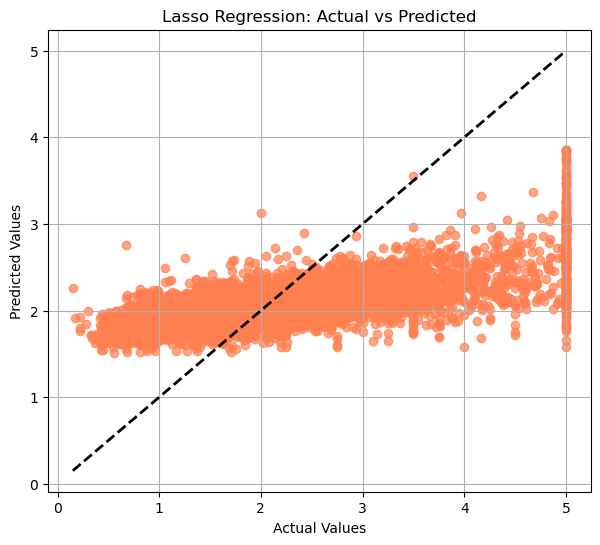

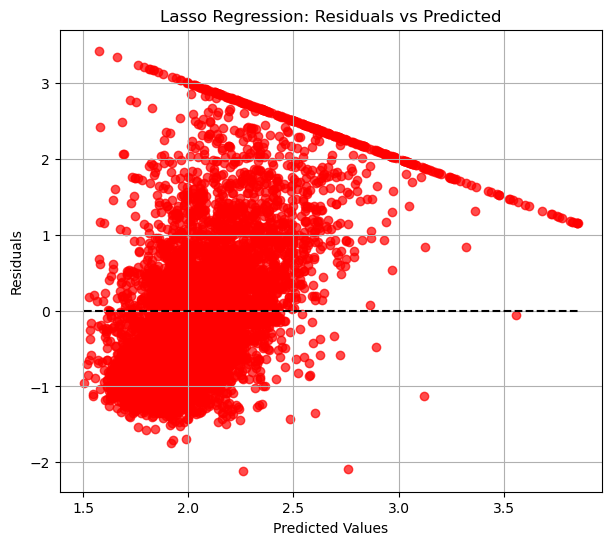

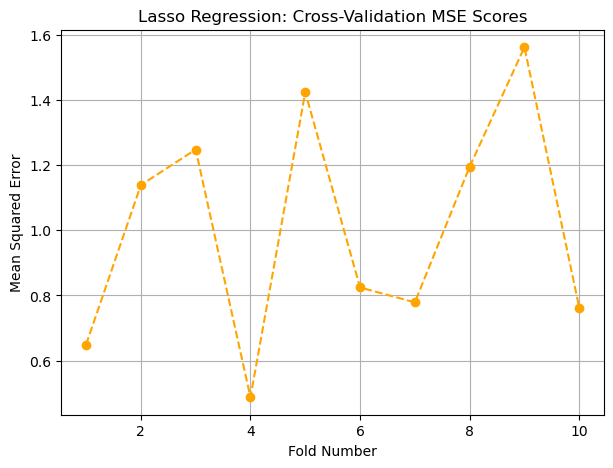

Ridge Regression - Mean Squared Error: 0.5305052690933723
Ridge Regression - R² Score: 0.5958178603951618
Ridge Regression - Cross-Validation MSE Scores: [0.48896236 0.43340416 0.88653364 0.39088644 0.74801889 0.52974437
 0.28797845 0.77335423 0.64306096 0.32747483]
Ridge Regression - Mean CV MSE Score: 0.5509418308485295


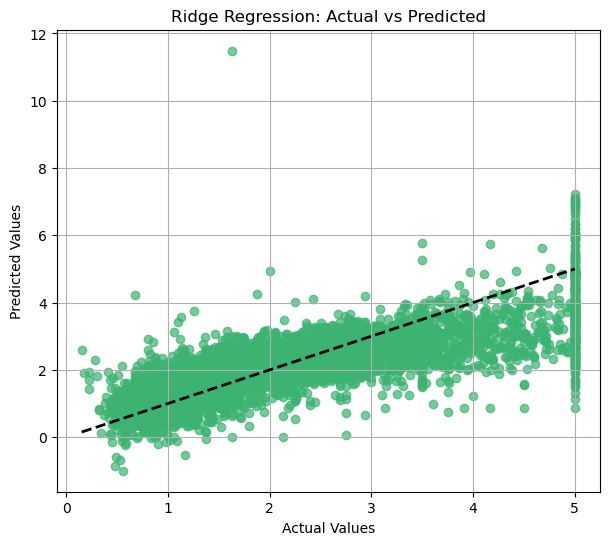

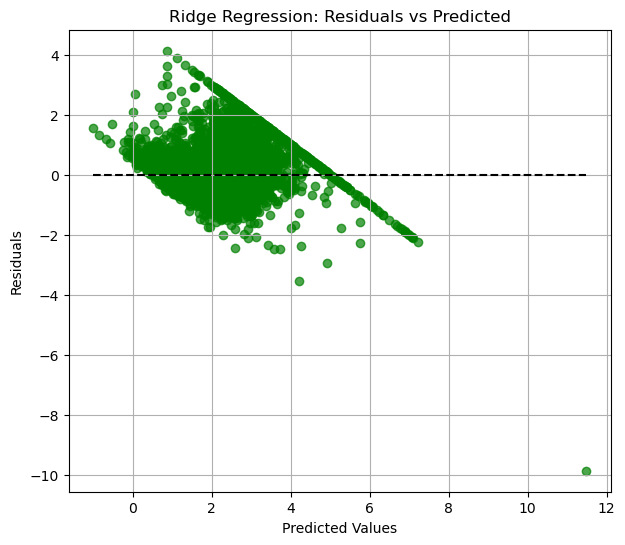

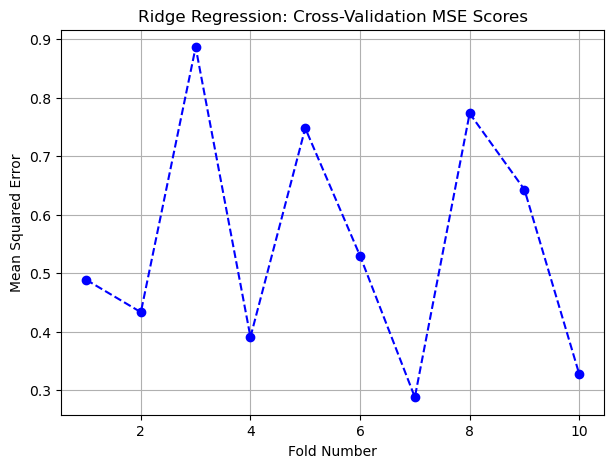

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and evaluate Lasso Regression model
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R² Score: {r2_lasso}")

# Perform k-cross-validation for Lasso
cv_scores_lasso = cross_val_score(lasso, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Lasso Regression - Cross-Validation MSE Scores: {-cv_scores_lasso}")
print(f"Lasso Regression - Mean CV MSE Score: {-np.mean(cv_scores_lasso)}")

# Visualization for Lasso
# Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.7, color='coral')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

# Residuals plot
residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(7, 6))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.7, color='red')
plt.hlines(y=0, xmin=y_pred_lasso.min(), xmax=y_pred_lasso.max(), colors='black', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Lasso Regression: Residuals vs Predicted')
plt.grid(True)
plt.show()

# Cross-validation MSE plot for Lasso
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), -cv_scores_lasso, marker='o', linestyle='--', color='orange')
plt.title('Lasso Regression: Cross-Validation MSE Scores')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Create and evaluate Ridge Regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R² Score: {r2_ridge}")

# Perform k-cross-validation for Ridge
cv_scores_ridge = cross_val_score(ridge, X, y, cv=10, scoring='neg_mean_squared_error')
print(f"Ridge Regression - Cross-Validation MSE Scores: {-cv_scores_ridge}")
print(f"Ridge Regression - Mean CV MSE Score: {-np.mean(cv_scores_ridge)}")

# Visualization for Ridge
# Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

# Residuals plot
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(7, 6))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.7, color='green')
plt.hlines(y=0, xmin=y_pred_ridge.min(), xmax=y_pred_ridge.max(), colors='black', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Regression: Residuals vs Predicted')
plt.grid(True)
plt.show()

# Cross-validation MSE plot for Ridge
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), -cv_scores_ridge, marker='o', linestyle='--', color='blue')
plt.title('Ridge Regression: Cross-Validation MSE Scores')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>6. Logistic regression</h1>
</div>

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC Score: 1.0


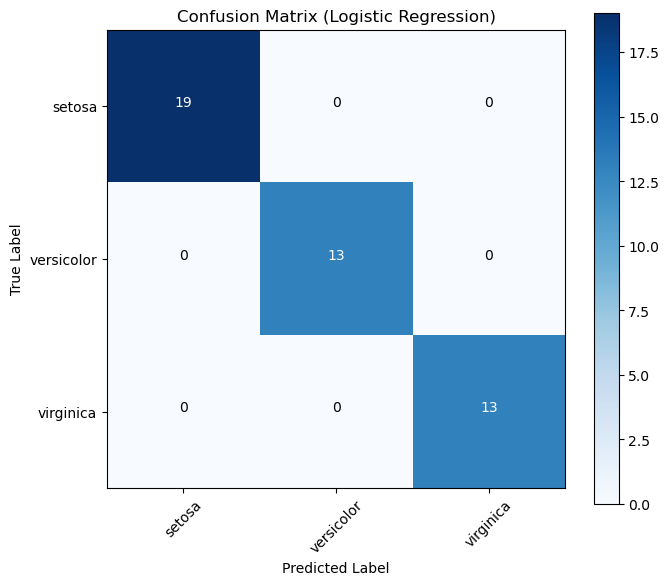

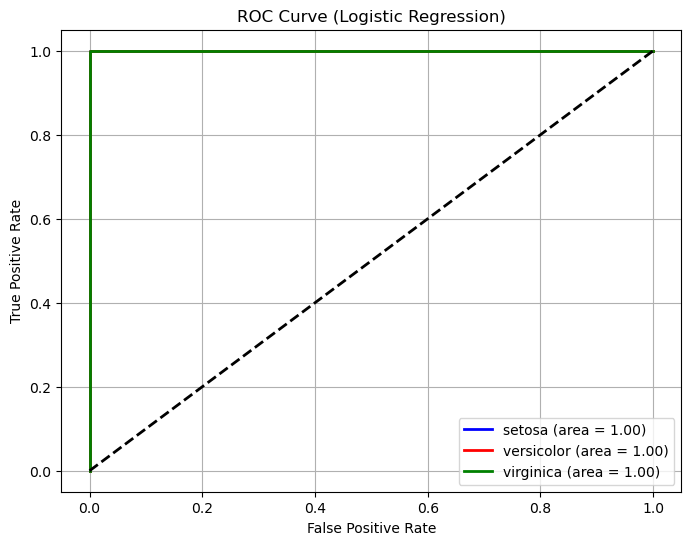

Cross-Validation Scores: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Mean CV Score: 0.9733333333333334


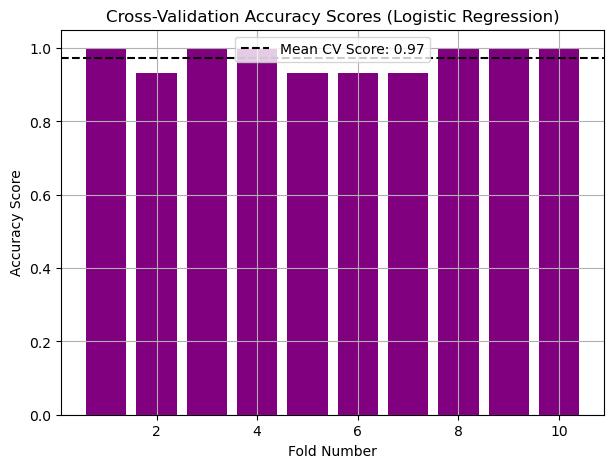

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

# Visualization - Confusion Matrix with labels and numbers
plt.figure(figsize=(7, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Annotate each cell with the numeric value
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.grid(False)
plt.show()

# Visualization - ROC Curve for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc_dict = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (area = {roc_auc_dict[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Visualization - Cross-validation scores
plt.figure(figsize=(7, 5))
plt.bar(range(1, 11), cv_scores, color='purple')
plt.axhline(np.mean(cv_scores), color='black', linestyle='--', label=f'Mean CV Score: {np.mean(cv_scores):.2f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Accuracy Scores (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>7. Artificial Neural Network</h1>
</div>

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC Score: 1.0


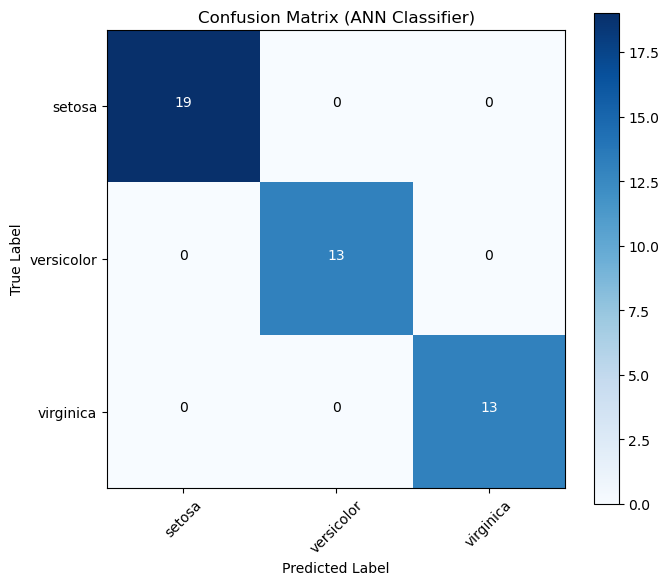

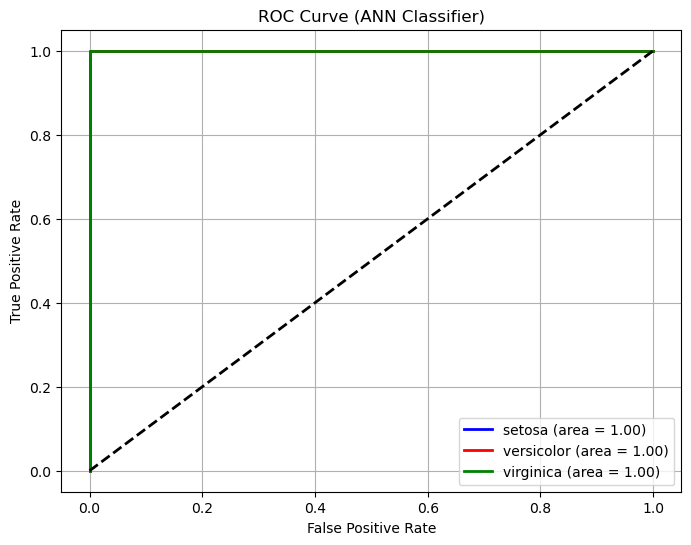

Cross-Validation Scores: [1.         1.         1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
Mean CV Score: 0.9800000000000001


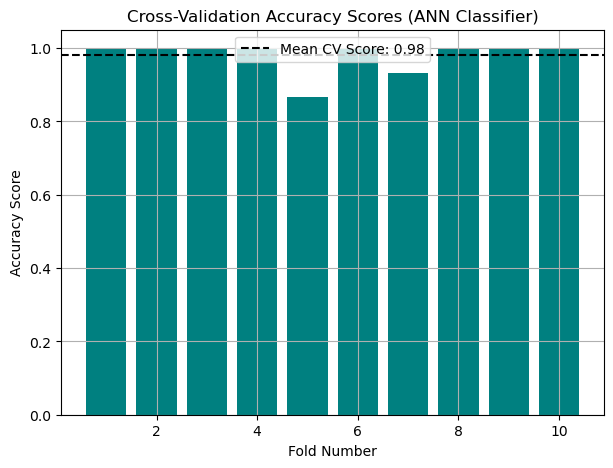

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an ANN classifier
model = MLPClassifier(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

# Visualization - Confusion Matrix with labels and numbers
plt.figure(figsize=(7, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (ANN Classifier)')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Annotate each cell with the numeric value
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.grid(False)
plt.show()

# Visualization - ROC Curve for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc_dict = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (area = {roc_auc_dict[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (ANN Classifier)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Visualization - Cross-validation scores
plt.figure(figsize=(7, 5))
plt.bar(range(1, 11), cv_scores, color='teal')
plt.axhline(np.mean(cv_scores), color='black', linestyle='--', label=f'Mean CV Score: {np.mean(cv_scores):.2f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Accuracy Scores (ANN Classifier)')
plt.legend()
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>8. K-NN classifier</h1>
</div>

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC Score: 1.0


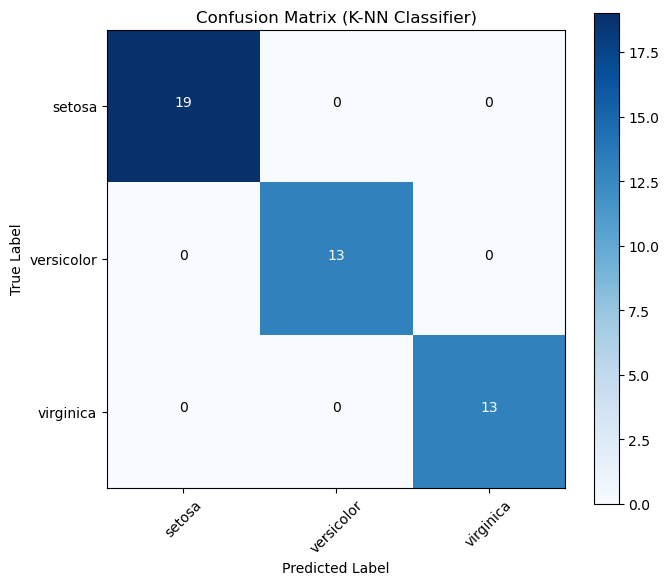

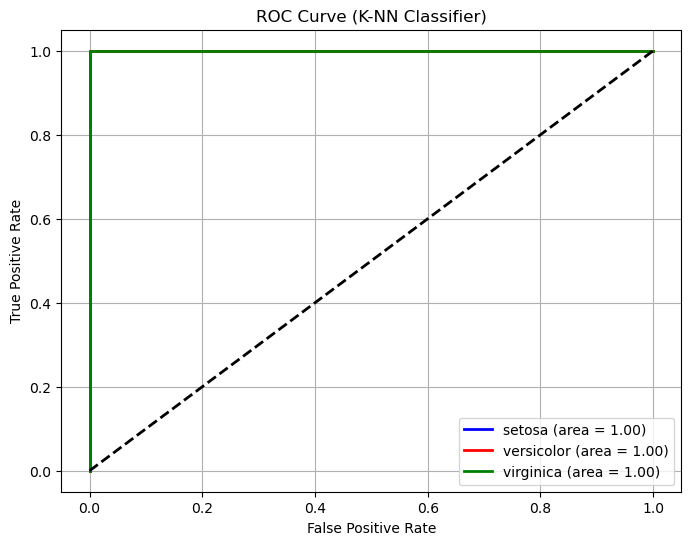

Cross-Validation Scores: [1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
Mean CV Score: 0.9666666666666668


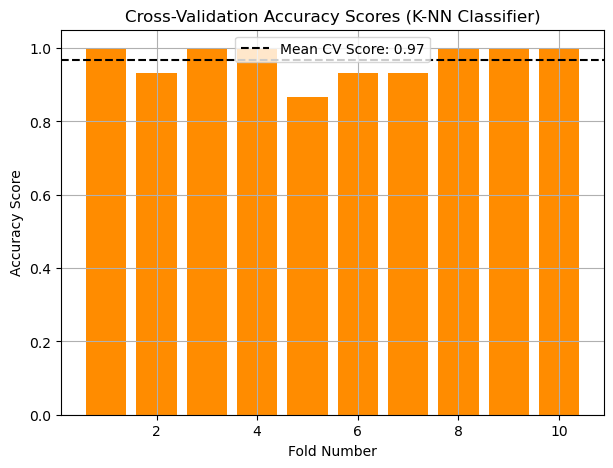

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a K-NN classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

# Visualization - Confusion Matrix with labels
plt.figure(figsize=(7, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (K-NN Classifier)')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Annotate each cell with numeric value
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.grid(False)
plt.show()

# Visualization - ROC Curve for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc_dict = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (area = {roc_auc_dict[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (K-NN Classifier)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Visualization - Cross-validation scores
plt.figure(figsize=(7, 5))
plt.bar(range(1, 11), cv_scores, color='darkorange')
plt.axhline(np.mean(cv_scores), color='black', linestyle='--', label=f'Mean CV Score: {np.mean(cv_scores):.2f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Accuracy Scores (K-NN Classifier)')
plt.legend()
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>9. Decision tree classification</h1>
</div>

Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

ROC AUC Score: 1.0


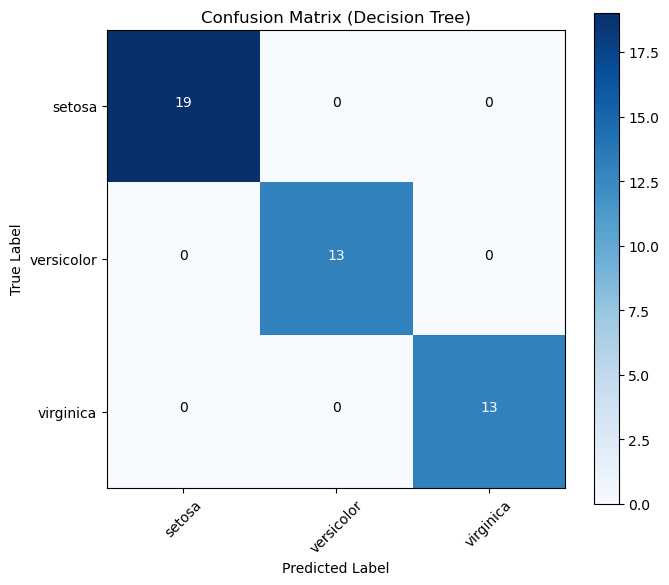

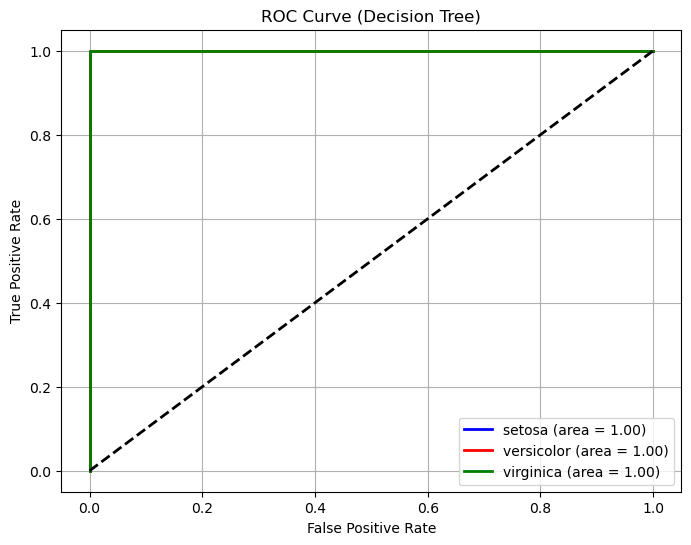

Cross-Validation Scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Mean CV Score: 0.9533333333333334


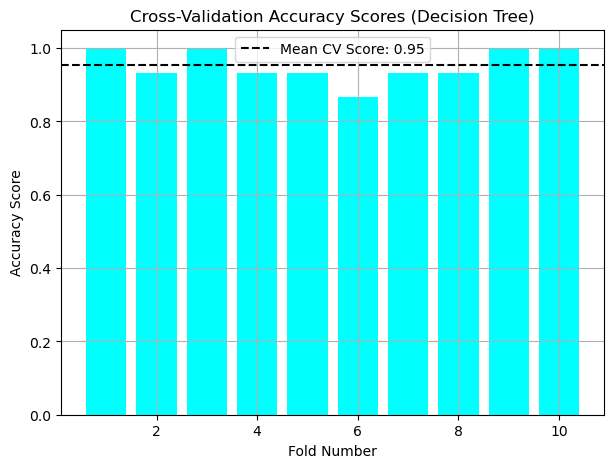

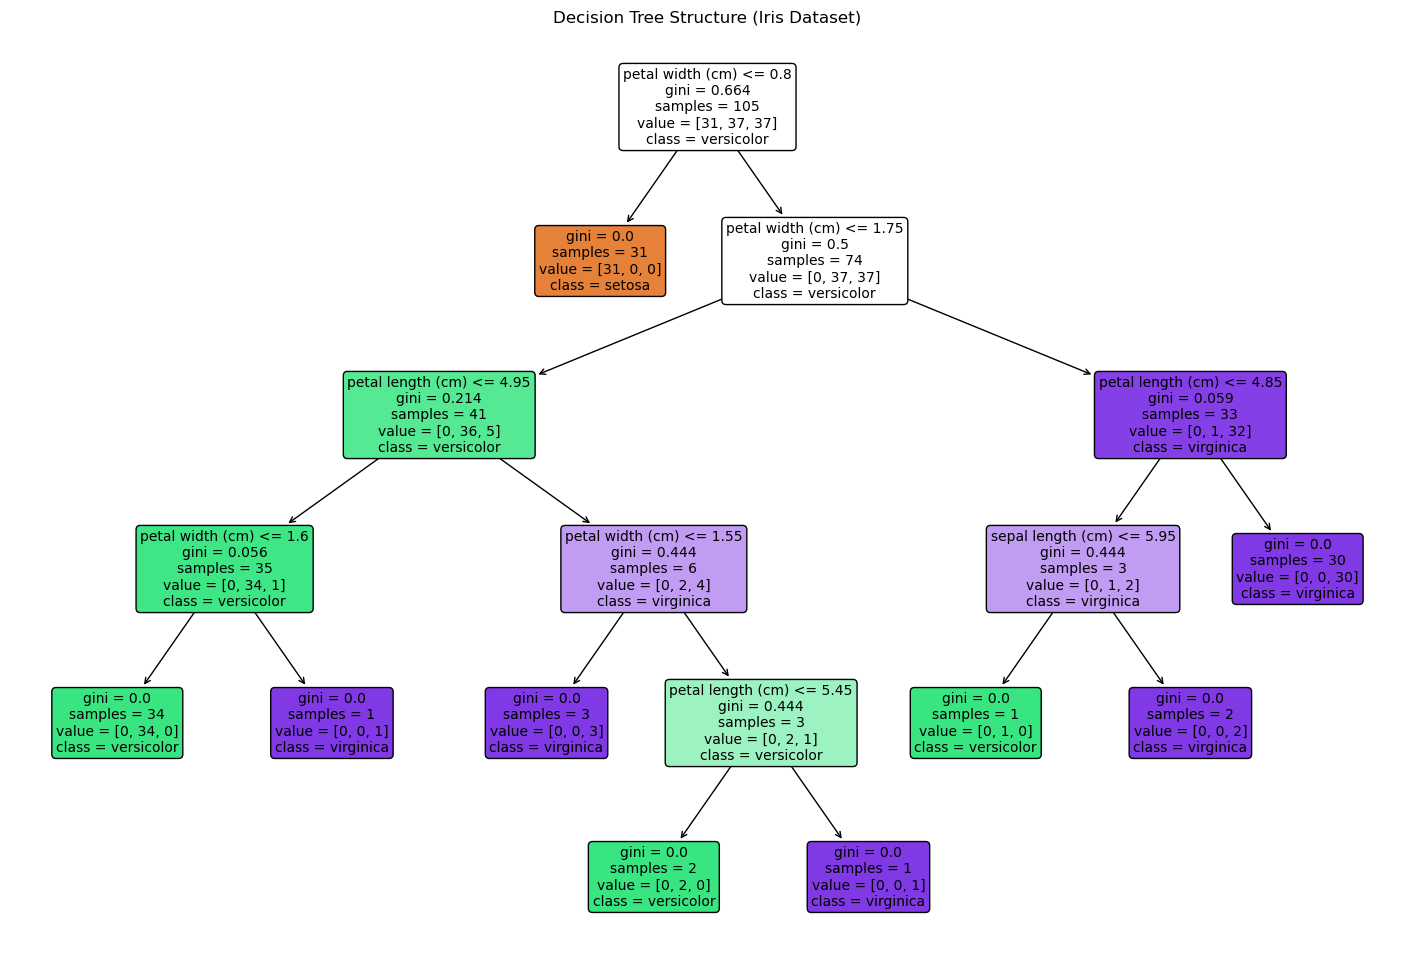

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names.tolist()  # Convert to list explicitly

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

# Visualization - Confusion Matrix with labels
plt.figure(figsize=(7, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Decision Tree)')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

# Annotate each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.grid(False)
plt.show()

# Visualization - ROC Curve for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc_dict = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (area = {roc_auc_dict[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Visualization - Cross-validation scores
plt.figure(figsize=(7, 5))
plt.bar(range(1, 11), cv_scores, color='cyan')
plt.axhline(np.mean(cv_scores), color='black', linestyle='--', label=f'Mean CV Score: {np.mean(cv_scores):.2f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Accuracy Scores (Decision Tree)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Decision Tree Plot
plt.figure(figsize=(18, 12))
plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Structure (Iris Dataset)')
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>10. SVM classification</h1>
</div>

Accuracy: 0.8
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

ROC AUC Score: 0.9238782051282052


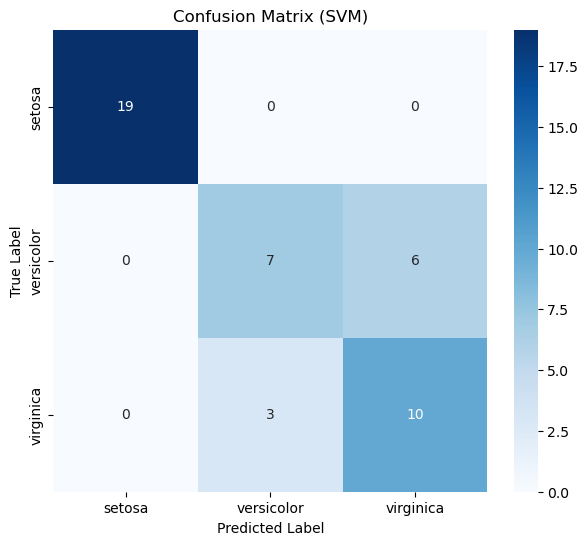

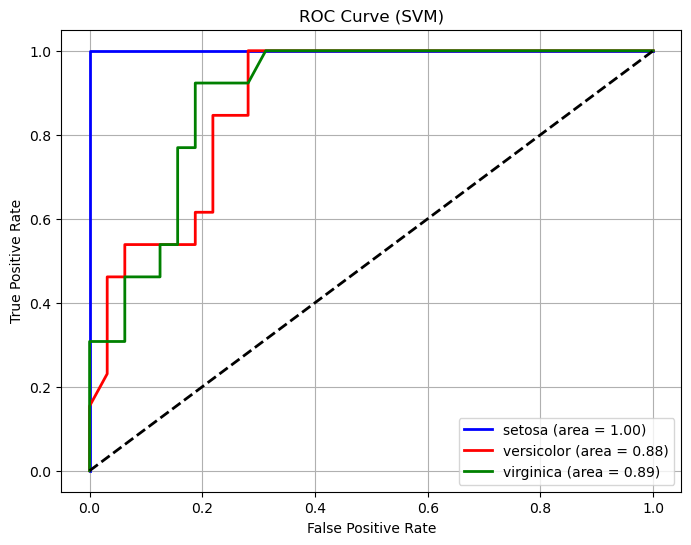

Cross-Validation Scores: [0.66666667 0.8        0.86666667 0.86666667 0.86666667 0.66666667
 0.86666667 0.86666667 0.93333333 0.86666667]
Mean CV Score: 0.8266666666666668


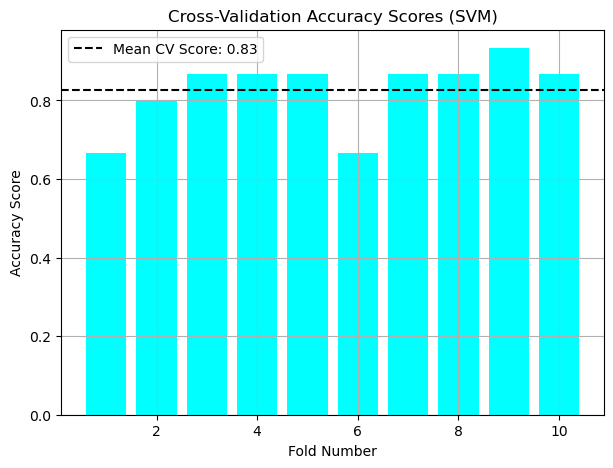

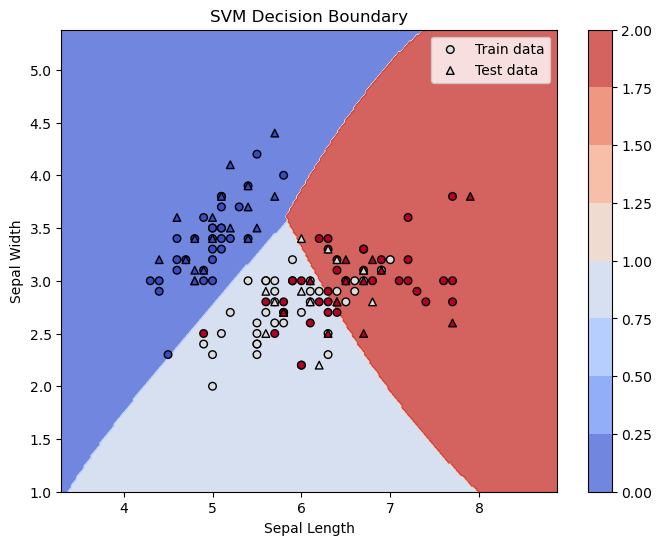

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Select only two features (for visualization purposes)
X = X[:, :2]  # Only sepal length and sepal width
target_names = iris.target_names

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
model = SVC(probability=True)
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")
print(f"ROC AUC Score: {roc_auc}")

# Visualization - Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix (SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization - ROC Curve for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc_dict = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{target_names[i]} (area = {roc_auc_dict[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Perform k-cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Visualization - Cross-validation scores
plt.figure(figsize=(7, 5))
plt.bar(range(1, 11), cv_scores, color='cyan')
plt.axhline(np.mean(cv_scores), color='black', linestyle='--', label=f'Mean CV Score: {np.mean(cv_scores):.2f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('Cross-Validation Accuracy Scores (SVM)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Decision Boundary
# Define the grid for plotting the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and the points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.colorbar()

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='k', marker='o', label='Train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='k', marker='^', label='Test data')

# Label the axes and the title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary')
plt.legend(loc='best')
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>11. K-means clustering</h1>
</div>

K-Means Clustering Results:
Number of clusters: 3
Inertia (Sum of squared distances): 139.82049635974982
Silhouette Score: 0.45994823920518635
Adjusted Rand Index: 0.6201351808870379
Normalized Mutual Information: 0.659486892724918
Cluster distribution:
Cluster 0: 53 samples
Cluster 1: 50 samples
Cluster 2: 47 samples
Cluster Centers:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


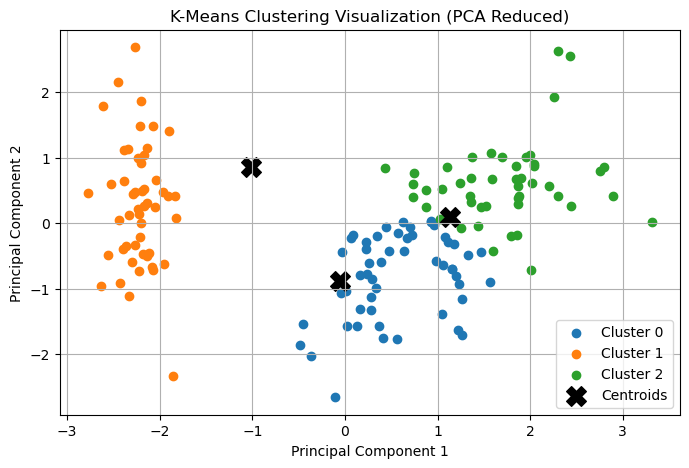

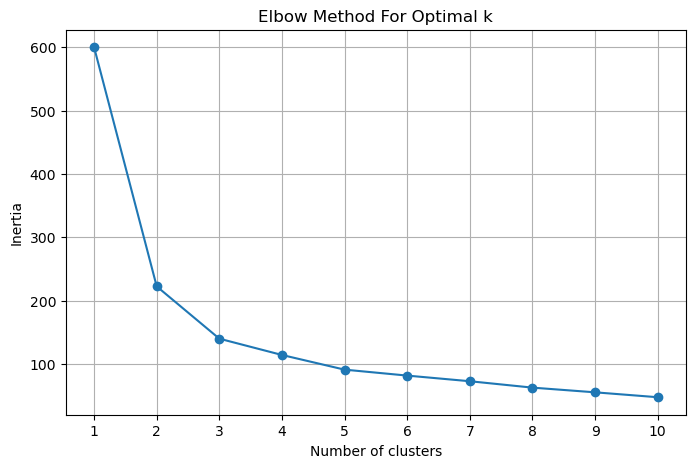

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create K-Means model
k = 3 # Number of clusters (known from the dataset)
model = KMeans(n_clusters=k, random_state=42, n_init=10)
model.fit(X_scaled)

# Get cluster assignments
clusters = model.labels_

# Evaluate the model
inertia = model.inertia_
silhouette = silhouette_score(X_scaled, clusters)
print("K-Means Clustering Results:")
print(f"Number of clusters: {k}")
print(f"Inertia (Sum of squared distances): {inertia}")
print(f"Silhouette Score: {silhouette}")

# Compare with ground truth (only for this dataset since we know the true labels)
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari = adjusted_rand_score(y, clusters)
nmi = normalized_mutual_info_score(y, clusters)
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

# Count samples in each cluster
unique, counts = np.unique(clusters, return_counts=True)
print("Cluster distribution:")
for i, (cluster, count) in enumerate(zip(unique, counts)):
    print(f"Cluster {cluster}: {count} samples")

# Get cluster centers
centers = model.cluster_centers_
print(f"Cluster Centers:\n{centers}")

# ---------------- Visualization Part ----------------

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 5))
for cluster in range(k):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Elbow Method to find optimal k
inertia_list = []
k_range = range(1, 11)
for i in k_range:
    km = KMeans(n_clusters=i, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


<div style="text-align:center; font-weight:bold;">
    <h1>12. Hierarchical clustering</h1>
</div>

Hierarchical Clustering Results:
Number of clusters: 3
Linkage: ward
Silhouette Score: 0.4466890410285909
Adjusted Rand Index: 0.6153229932145449
Normalized Mutual Information: 0.6754701853436886
Cluster distribution:
Cluster 0: 71 samples
Cluster 1: 49 samples
Cluster 2: 30 samples


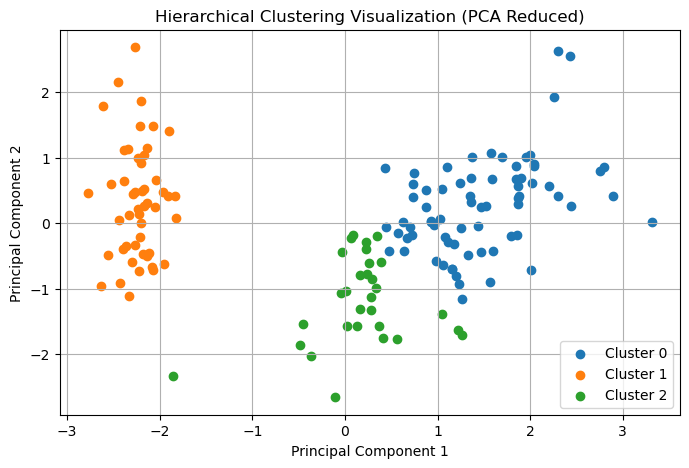

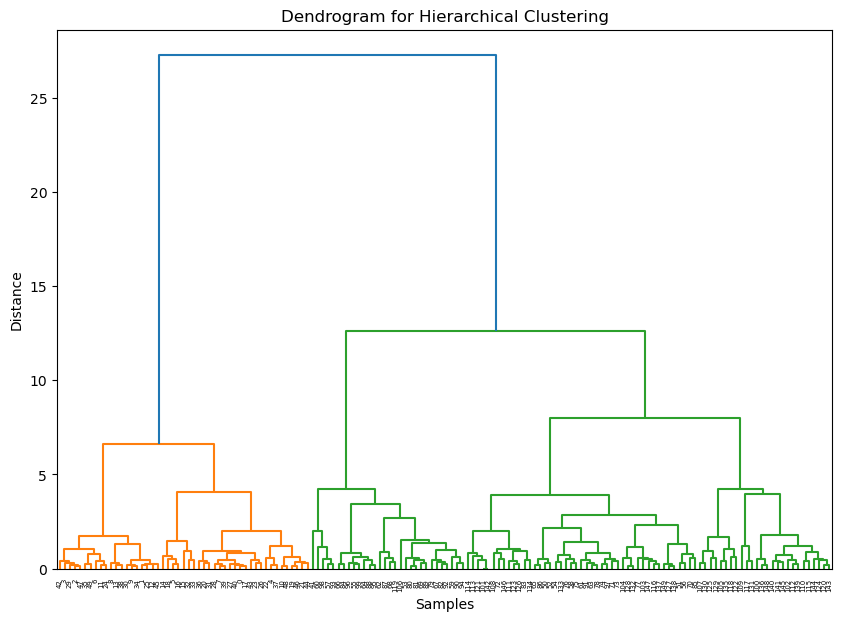

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create Hierarchical Clustering model
n_clusters = 3 # Number of clusters (known from the dataset)
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = model.fit_predict(X_scaled)

# Evaluate the model
silhouette = silhouette_score(X_scaled, clusters)
print("Hierarchical Clustering Results:")
print(f"Number of clusters: {n_clusters}")
print(f"Linkage: {model.linkage}")
print(f"Silhouette Score: {silhouette}")

# Compare with ground truth (only for this dataset since we know the true labels)
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
ari = adjusted_rand_score(y, clusters)
nmi = normalized_mutual_info_score(y, clusters)
print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

# Count samples in each cluster
unique, counts = np.unique(clusters, return_counts=True)
print("Cluster distribution:")
for i, (cluster, count) in enumerate(zip(unique, counts)):
    print(f"Cluster {cluster}: {count} samples")

# ---------------- Visualization Part ----------------

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
for cluster in range(n_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Hierarchical Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
